In [7]:
import torch

### Scalars

In [8]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

In [9]:
x + y, x - y, x * y, x / y, x**y

(tensor(5.), tensor(1.), tensor(6.), tensor(1.5000), tensor(9.))

### Vectors

In [10]:
x = torch.arange(3)
x

tensor([0, 1, 2])

By default, we visualize vectors by stacking their elements vertically.

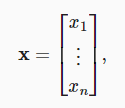

We can also distinguish between such column vectors and row vectors whose elements are stacked horizontally.

In [11]:
x[2]

tensor(2)

In [12]:
len(x)

3

In [13]:
x.shape

torch.Size([3])

The shape is a tuple that indicates a tensor’s length along each axis. Tensors with just one axis have shapes with just one element.